In [65]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
url = "http://time.com/4572079/best-inventions-2016/"
data = urllib.request.urlopen(url).read()
soup = BeautifulSoup(data, 'html.parser')

In [24]:
inv = soup.find_all("div", {"class": "headline"})

In [33]:
inv_list=[]
for invs in inv:
    string=invs.text[1:-1]
    inv_list.append(string)
df = pd.DataFrame(inv_list, columns=['Inventions'])
df

,Inventions
0,The Levitating Lig...
1,The Folding Bike H...
2,Solar Panels That ...
3,Shoes That Tie The...
4,Soccer Fields That...
5,The Headset Leadin...
6,Cannabis That Coul...
7,The Ultimate Alarm...
8,Tires That Spin In...
9,"A Sleeker, Smarter..."


In [36]:
df=pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [39]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [40]:
df.dropna(thresh=4000, axis=1, inplace=True)
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [42]:
df['overview'].fillna(value='Overview not available', inplace=True)
df['overview'].isnull().sum()

0

In [43]:
df['release_date'].fillna(method='ffill', inplace=True)

In [44]:
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [46]:
df = pd.read_table('http://bit.ly/chiporders')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [51]:
#duplicated rows
df.duplicated().sum()

59

In [57]:
for column in df.columns:
    res = df.duplicated([column]).sum()
    print(column, res)

order_id 2788
quantity 4613
item_name 4572
choice_description 3578
item_price 4544


In [64]:
cols = ['order_id', 'item_name', 'item_price']
df.drop_duplicates(cols, keep=False, inplace=True)
df.duplicated(cols).sum()

0

In [66]:
df=pd.DataFrame(np.random.randn(100000,5))
df.head()

,0,1,2,3,4
0,-0.727105,1.046560,-0.607274,-1.243650,0.944438
1,0.074865,-0.291513,1.236327,-0.538724,-0.170097
2,-1.795572,-0.155983,-2.333563,0.096462,-0.827875
3,0.862003,1.016522,1.219218,-2.326241,1.554472
4,-1.415940,1.310329,-0.798703,-0.218574,1.076975


In [67]:
df.mean()

0   -0.006330
1    0.003365
2    0.001243
3    0.003705
4   -0.003319
dtype: float64

In [69]:
df.std()

0    0.999304
1    1.000480
2    1.002412
3    1.001130
4    1.002498
dtype: float64

In [85]:
filter0 = np.abs(df[0]-df[0].mean()) > (3*df[0].std())

In [74]:
filter_all = np.abs(df-df.mean())>(3*df.std())
filter_all.head()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [86]:
filter_any=filter_all.any(axis=1)
filter_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [79]:
outliers = df.loc[filter_any, :]
outliers.shape

(1342, 5)

In [87]:
1342/500000

0.002684

In [89]:
df_new = df.drop(outliers.index, axis=0)

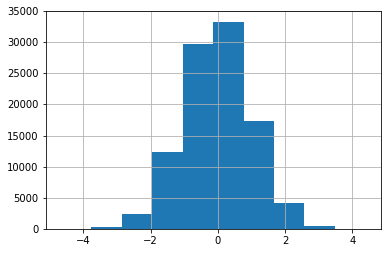

In [90]:
df[0].hist()
plt.show()

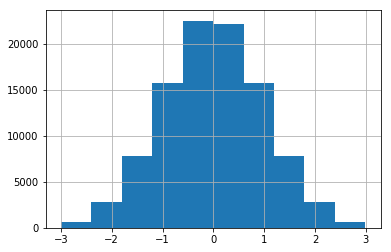

In [92]:
df_new[0].hist()
plt.show()

In [93]:
df_new[0].head()

0   -0.727105
1    0.074865
2   -1.795572
3    0.862003
4   -1.415940
Name: 0, dtype: float64

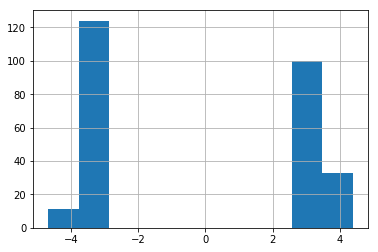

In [97]:
df_new0 = df[0][filter0]
df_new0.hist()

In [99]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [100]:
filtRuntime = data['runtime'] > 180
filtRuntime.sum()

44

In [101]:
data['original_title'][filtRuntime]

24                                          King Kong
25                                            Titanic
110                                      Pearl Harbor
329     The Lord of the Rings: The Return of the King
676                                        Wyatt Earp
690                                    The Green Mile
855                                 Gods and Generals
880                                        Grindhouse
1091                                            Nixon
1109                                    Heaven's Gate
1125                                        Cleopatra
1181                                              JFK
1333                                         Magnolia
1387                                        Malcolm X
1477                                             Reds
1663                      Once Upon a Time in America
1759                                  The Right Stuff
1818                                 Schindler's List
1922                        

In [105]:
filter180_8 = filtRuntime | (data['vote_average'] > 8)
data['original_title'][filter180_8].head()

24          King Kong
25            Titanic
65    The Dark Knight
95       Interstellar
96          Inception
Name: original_title, dtype: object

In [106]:
data = {'class': [1, 1, 1, 2, 2],
        'score': [10, 21, 35, 11, 26],
        'result': [0, 1, 0, 1, 0],
        'performance': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(data)

In [107]:
df.result.map({0:'fail', 1:'pass'})

0    fail
1    pass
2    fail
3    pass
4    fail
Name: result, dtype: object

In [108]:
df['pass or fail'] = df.result.map({0:'fail', 1:'pass'})
df

,class,performance,result,score,pass or fail
0,1,strong,0,10,fail
1,1,weak,1,21,pass
2,1,normal,0,35,fail
3,2,weak,1,11,pass
4,2,strong,0,26,fail


In [109]:
def stand(x):
    mean=df.score.mean()
    std=df.score.std()
    y = (x-mean)/std
    return y

In [111]:
df['score standard']=df.score.apply(stand)
df

,class,performance,result,score,pass or fail,score standard
0,1,strong,0,10,fail,-1.009295
1,1,weak,1,21,pass,0.038087
2,1,normal,0,35,fail,1.371118
3,2,weak,1,11,pass,-0.914078
4,2,strong,0,26,fail,0.514169


In [112]:
df_num =df.loc[:, ['class', 'result', 'score', 'score standard']]
df_num

,class,result,score,score standard
0,1,0,10,-1.009295
1,1,1,21,0.038087
2,1,0,35,1.371118
3,2,1,11,-0.914078
4,2,0,26,0.514169


In [113]:
df_num.apply(max, axis=0)

class              2.000000
result             1.000000
score             35.000000
score standard     1.371118
dtype: float64

In [114]:
df = pd.read_csv('cereal.csv')

In [115]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [117]:
df['Manufacturer'] = df['mfr'].map({'A' : 'American Home Food Products', 'G' : 'General Mills',
                                    'K' : 'Kelloggs', 'N' : 'Nabisco', 'P' : 'Post', 'Q' : 'Quaker Oats',
                                    'R' : 'Ralston Purina'})
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina


In [119]:
df['kJ'] = df['calories'] * 4.184
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer,kJ
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco,292.88
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats,502.08
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs,292.88
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs,209.20
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina,460.24


In [123]:
numlist = np.arange(3, 12)

for i in numlist:
    filtmax = df.iloc[:,i] == np.max(df.iloc[:,i])
    maxcereal = df['name'][filtmax]
    print(df.columns[i], maxcereal)

calories 46    Mueslix Crispy Blend
Name: name, dtype: object
protein 11     Cheerios
67    Special K
Name: name, dtype: object
fat 1    100% Natural Bran
Name: name, dtype: object
sodium 53    Product 19
Name: name, dtype: object
fiber 3    All-Bran with Extra Fiber
Name: name, dtype: object
carbo 61    Rice Chex
Name: name, dtype: object
sugars 30    Golden Crisp
66          Smacks
Name: name, dtype: object
potass 3    All-Bran with Extra Fiber
Name: name, dtype: object
vitamins 38    Just Right Crunchy  Nuggets
39         Just Right Fruit & Nut
53                     Product 19
69              Total Corn Flakes
70              Total Raisin Bran
71              Total Whole Grain
Name: name, dtype: object


In [124]:
df.set_index('name', inplace=True)

In [125]:
df.iloc[:, numlist].apply(np.argmax)

protein                        Cheerios
fat                   100% Natural Bran
sodium                       Product 19
fiber         All-Bran with Extra Fiber
carbo                         Rice Chex
sugars                     Golden Crisp
potass        All-Bran with Extra Fiber
vitamins    Just Right Crunchy  Nuggets
shelf                         100% Bran
dtype: object

In [126]:
df1 = pd.DataFrame(np.full((2,3),'x', dtype=object), columns=['A', 'B', 'C'])
df2 = pd.DataFrame(np.full((3,3),'o', dtype=object), columns=['A', 'B', 'C'])
df3 = pd.DataFrame(np.full((2,2),'v', dtype=object), columns=['D', 'E'])

In [127]:
pd.concat([df1,df2])

,A,B,C
0,x,x,x
1,x,x,x
0,o,o,o
1,o,o,o
2,o,o,o


In [128]:
 pd.concat([df1,df2]).reset_index(drop=True)

,A,B,C
0,x,x,x
1,x,x,x
2,o,o,o
3,o,o,o
4,o,o,o


In [129]:
pd.concat([df1,df3])

,A,B,C,D,E
0,x,x,x,NaN,NaN
1,x,x,x,NaN,NaN
0,NaN,NaN,NaN,v,v
1,NaN,NaN,NaN,v,v


In [130]:
df4 = pd.concat([df1,df2], keys=['df1', 'df2'])
df4

A  B  C
df1 0  x  x  x
    1  x  x  x
df2 0  o  o  o
    1  o  o  o
    2  o  o  o

In [131]:
pd.concat([df1,df2], axis=1, join='inner')

,A,B,C,A,B,C
0,x,x,x,o,o,o
1,x,x,x,o,o,o


In [141]:
users = pd.DataFrame( {'userID': [5672, 3452, 2878, 3234],
                'First Name': ['Christopher', 'Johnnie', 'Debbie', 'Teri'],
                'Last Name': ['Boyd','Baldwin', 'Alvarez', 'Gill']})
users

,First Name,Last Name,userID
0,Christopher,Boyd,5672
1,Johnnie,Baldwin,3452
2,Debbie,Alvarez,2878
3,Teri,Gill,3234


In [142]:
scores = pd.DataFrame( {'userID': [2878, 5672, 3234, 5672, 2878],
                'Score': [84,56,72,77,88]})
scores

,Score,userID
0,84,2878
1,56,5672
2,72,3234
3,77,5672
4,88,2878


In [137]:
merged_df = pd.merge(users, scores) 
merged_df

,First Name,Last Name,userID,Score
0,Christopher,Boyd,5672,56
1,Christopher,Boyd,5672,77
2,Debbie,Alvarez,2878,84
3,Debbie,Alvarez,2878,88
4,Teri,Gill,3234,72


In [139]:
scores2 = pd.DataFrame( {'studentID': [2878, 5672, 3234, 5672, 2878],
                'Score': [84,56,72,77,88]})
scores2

,Score,studentID
0,84,2878
1,56,5672
2,72,3234
3,77,5672
4,88,2878


In [140]:
pd.merge(users, scores2)

MergeError: No common columns to perform merge on

In [143]:
pd.merge(users, scores2, left_on='userID', right_on='studentID')

,First Name,Last Name,userID,Score,studentID
0,Christopher,Boyd,5672,56,5672
1,Christopher,Boyd,5672,77,5672
2,Debbie,Alvarez,2878,84,2878
3,Debbie,Alvarez,2878,88,2878
4,Teri,Gill,3234,72,3234


In [144]:
gold = pd.DataFrame({'Code': ['CAN', 'GER', 'USA', 'NOR'],
               'Country': ['Canada', 'Germany', 'United States', 'Norway'],
               'Total': [ 14, 10, 9, 9]})
gold

,Code,Country,Total
0,CAN,Canada,14
1,GER,Germany,10
2,USA,United States,9
3,NOR,Norway,9


In [145]:
bronze= pd.DataFrame({'Code': ['USA','GER', 'NOR', 'AUS'],
               'Country': ['United States', 'Germany', 'Norway', 'Austria'],
               'Total': [ 13, 7, 7, 6]})
bronze

,Code,Country,Total
0,USA,United States,13
1,GER,Germany,7
2,NOR,Norway,7
3,AUS,Austria,6


In [148]:
pd.merge(gold,bronze)

,Code,Country,Total


In [150]:
pd.merge(gold, bronze, on=['Code', 'Country'])

,Code,Country,Total_x,Total_y
0,GER,Germany,10,7
1,USA,United States,9,13
2,NOR,Norway,9,7


In [156]:
pd.merge(gold, bronze, on=['Code', 'Country'], suffixes=['_gold', '_bronze'], how='outer')

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14.0,NaN
1,GER,Germany,10.0,7.0
2,USA,United States,9.0,13.0
3,NOR,Norway,9.0,7.0
4,AUS,Austria,NaN,6.0


In [158]:
pd.merge(gold, bronze, on=['Code', 'Country'], suffixes=['_gold', '_bronze'], how='left')

,Code,Country,Total_gold,Total_bronze
0,CAN,Canada,14,NaN
1,GER,Germany,10,7.0
2,USA,United States,9,13.0
3,NOR,Norway,9,7.0


In [160]:
pd.merge(gold, bronze, on=['Code', 'Country'], suffixes=['_gold', '_bronze'], how='right')

,Code,Country,Total_gold,Total_bronze
0,GER,Germany,10.0,7
1,USA,United States,9.0,13
2,NOR,Norway,9.0,7
3,AUS,Austria,NaN,6


In [161]:
df1 = pd.DataFrame({'key': [1,2,3,4], 'val1': [1,2,3,4]})
df2 = pd.DataFrame({'key': [1,2,3,5], 'val2': [1,2,3,4]})

In [162]:
df_in = df1.merge(df2, how='inner')
df_in

,key,val1,val2
0,1,1,1
1,2,2,2
2,3,3,3


In [163]:
df_in.dtypes

key     int64
val1    int64
val2    int64
dtype: object

In [164]:
df_out = df1.merge(df2, how='outer')
df_out

,key,val1,val2
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,NaN
4,5,NaN,4.0


In [168]:
df_out.dtypes

key       int64
val1    float64
val2    float64
dtype: object

In [169]:
left = pd.DataFrame({'key1': ['a', 'b', 'c'], 'key2': ['A', 'B', 'C'], 'lval': [ 0, 1, 2]})
right = pd.DataFrame({'key1': ['a', 'b', 'c'], 'key2': ['A', 'D', 'C'], 'rval': [ 3, 4, 6]})

In [170]:
left

,key1,key2,lval
0,a,A,0
1,b,B,1
2,c,C,2


In [171]:
right

,key1,key2,rval
0,a,A,3
1,b,D,4
2,c,C,6


In [173]:
left.merge(right, how='inner')

,key1,key2,lval,rval
0,a,A,0,3
1,c,C,2,6


In [174]:
right.merge(left, how='outer')

,key1,key2,rval,lval
0,a,A,3.0,0.0
1,b,D,4.0,NaN
2,c,C,6.0,2.0
3,b,B,NaN,1.0


In [179]:
right.merge(left, how='left')

,key1,key2,rval,lval
0,a,A,3,0.0
1,b,D,4,NaN
2,c,C,6,2.0


In [191]:
left.merge(right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,a,A,0,A,3
1,b,B,1,D,4
2,c,C,2,C,6


In [192]:
values = [3, 81, 1, 56, 71, 91, 54, 94, 64, 90, 21, 36]
coordinates = ['x','y','z'] * 4
time = [0]*3 + [1]*3 + [2]*3 + [3]*3
df = pd.DataFrame({'time':time, 'coordinates':coordinates, 'values':values})
df

,coordinates,time,values
0,x,0,3
1,y,0,81
2,z,0,1
3,x,1,56
4,y,1,71
5,z,1,91
6,x,2,54
7,y,2,94
8,z,2,64
9,x,3,90


In [193]:
df_pivot = df.pivot(index='time', columns='coordinates', values='values')
df_pivot

coordinates,x,y,z
time,,,
0,3,81,1
1,56,71,91
2,54,94,64
3,90,21,36


In [195]:
values2=[6,82,9,47,8,12,64,88,53,46,59,60]

In [196]:
df2=pd.DataFrame({'time':time*2, 'coordinates':coordinates*2, 'values':values+values2})
df2

,coordinates,time,values
0,x,0,3
1,y,0,81
2,z,0,1
3,x,1,56
4,y,1,71
5,z,1,91
6,x,2,54
7,y,2,94
8,z,2,64
9,x,3,90


In [201]:
df2_pivot = df2.pivot_table(index='time', columns='coordinates', values='values')
df2_pivot

coordinates,x,y,z
time,,,
0,4.5,81.5,5.0
1,51.5,39.5,51.5
2,59.0,91.0,58.5
3,68.0,40.0,48.0


In [202]:
def distance(a):
    x = np.max(a) - np.min(a)
    return x

In [203]:
df2_pivot = df2.pivot_table(index='time', columns='coordinates', values='values', aggfunc=distance)
df2_pivot

coordinates,x,y,z
time,,,
0,3,1,8
1,9,63,79
2,10,6,11
3,44,38,24


In [204]:
df2_pivot = df2.pivot_table(index='time', columns='coordinates', values='values', aggfunc=lambda x: tuple(x))
df2_pivot

coordinates,x,y,z
time,,,
0,"(3, 6)","(81, 82)","(1, 9)"
1,"(56, 47)","(71, 8)","(91, 12)"
2,"(54, 64)","(94, 88)","(64, 53)"
3,"(90, 46)","(21, 59)","(36, 60)"


In [210]:
df = pd.read_csv('songs.csv')
df.head()

,Musician,Genre,Name,Decade,Minutes
0,Led Zeppelin,hard rock,Stairway to Heaven,70,08:02
1,Led Zeppelin,hard rock,Kashmir,70,08:37
2,Led Zeppelin,hard rock,Immigrant Song,70,02:26
3,Led Zeppelin,hard rock,Whole Lotta Love,60,05:33
4,Led Zeppelin,hard rock,Black Dog,70,04:55


In [231]:
index = ['Decade', 'Musician', 'Name']
def set_x(minutes):
    return 'x'

In [236]:
df.pivot_table(index=index, values = 'Minutes', aggfunc=set_x, columns='Genre', fill_value=' ')

Genre                                          folk rock  hard rock pop rock
Decade Musician     Name                                                    
60     Bob Dylan    Blowin' in the Wind                 x                   
                    Like a Rolling Stone                x                   
       David Bowie  Space Oddity                                           x
       Led Zeppelin Good Times Bad Times                          x         
                    I Can't Quit You Baby                         x         
                    Moby Dick                                     x         
                    Ramble On                                     x         
                    Whole Lotta Love                              x         
70     Bob Dylan    Tangled Up in Blue                  x                   
       David Bowie  China Girl                                             x
                    Golden Years                                           x
                    Rebel Rebel                                            x
       Led Zeppelin All My Love                                   x         
                    Black Dog                                     x         
                    Immigrant Song                                x         
                    Kashmir                                       x         
                    Stairway to Heaven                            x         
                    The Song Remains the Same                     x         
80     David Bowie  Under Pressure                                         x
90     David Bowie  I'm Afraid of Americans                                x

In [245]:
df.set_index(['Decade', 'Musician'], inplace=True)

KeyError: 'Decade'

In [244]:
df

Genre                        Name Minutes
Decade Musician                                                    
70     Led Zeppelin   hard rock          Stairway to Heaven   08:02
       Led Zeppelin   hard rock                     Kashmir   08:37
       Led Zeppelin   hard rock              Immigrant Song   02:26
60     Led Zeppelin   hard rock            Whole Lotta Love   05:33
70     Led Zeppelin   hard rock                   Black Dog   04:55
60     Led Zeppelin   hard rock        Good Times Bad Times   02:43
       Led Zeppelin   hard rock                   Moby Dick   04:25
       Led Zeppelin   hard rock                   Ramble On   04:35
70     Led Zeppelin   hard rock                 All My Love   05:53
       Led Zeppelin   hard rock  The Song Remains the Same    05:24
60     Led Zeppelin   hard rock       I Can't Quit You Baby   04:42
       David Bowie     pop rock                Space Oddity   05:15
70     David Bowie     pop rock                 Rebel Rebel   04:22
80     David Bowie     pop rock              Under Pressure   04:08
70     David Bowie     pop rock                  China Girl   05:08
90     David Bowie     pop rock     I'm Afraid of Americans   05:00
70     David Bowie     pop rock                Golden Years   04:00
60     Bob Dylan     folk rock         Like a Rolling Stone   06:13
       Bob Dylan     folk rock          Blowin' in the Wind   02:48
70     Bob Dylan     folk rock           Tangled Up in Blue   05:42

In [246]:
df.index

MultiIndex(levels=[[60, 70, 80, 90], ['Bob Dylan', 'David Bowie', 'Led Zeppelin']],
           labels=[[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 0, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0]],
           names=['Decade', 'Musician'])

In [248]:
row_levels = [['R0','R1'], ['r00', 'r01', 'r10', 'r11']]
row_labels = [[0,0,1,1],[0,1,2,3]]
row_indices = pd.MultiIndex(row_levels, row_labels)
#define the MultiIndex for the columns
col_levels = [['C0','C1'], ['c00', 'c01', 'c10', 'c11']]
col_labels = [[0,0,1,1],[0,1,2,3]]
col_indices = pd.MultiIndex(col_levels, col_labels)
#define the data
data = np.random.randint(5, size=(4, 4))
#create the dataframe
df = pd.DataFrame(data, index=row_indices, columns=col_indices)
df

C0      C1    
       c00 c01 c10 c11
R0 r00   0   0   1   4
   r01   1   3   4   2
R1 r10   2   1   0   2
   r11   0   0   2   2

In [277]:
df.stack(level = 1)

C0   C1
R0 r00 c00  0.0  NaN
       c01  0.0  NaN
       c10  NaN  1.0
       c11  NaN  4.0
   r01 c00  1.0  NaN
       c01  3.0  NaN
       c10  NaN  4.0
       c11  NaN  2.0
R1 r10 c00  2.0  NaN
       c01  1.0  NaN
       c10  NaN  0.0
       c11  NaN  2.0
   r11 c00  0.0  NaN
       c01  0.0  NaN
       c10  NaN  2.0
       c11  NaN  2.0

In [255]:
df.unstack(level = 0)

C0                  C1               
     c00       c01       c10       c11     
      R0   R1   R0   R1   R0   R1   R0   R1
r00  0.0  NaN  0.0  NaN  1.0  NaN  4.0  NaN
r01  1.0  NaN  3.0  NaN  4.0  NaN  2.0  NaN
r10  NaN  2.0  NaN  1.0  NaN  0.0  NaN  2.0
r11  NaN  0.0  NaN  0.0  NaN  2.0  NaN  2.0

In [258]:
df.stack(level=0)

c00  c01  c10  c11
R0 r00 C0  0.0  0.0  NaN  NaN
       C1  NaN  NaN  1.0  4.0
   r01 C0  1.0  3.0  NaN  NaN
       C1  NaN  NaN  4.0  2.0
R1 r10 C0  2.0  1.0  NaN  NaN
       C1  NaN  NaN  0.0  2.0
   r11 C0  0.0  0.0  NaN  NaN
       C1  NaN  NaN  2.0  2.0

In [273]:
df.stack(level=0).unstack().dropna(axis=1).swaplevel(axis=1)

C0        C1     
        c00  c01  c10  c11
R0 r00  0.0  0.0  1.0  4.0
   r01  1.0  3.0  4.0  2.0
R1 r10  2.0  1.0  0.0  2.0
   r11  0.0  0.0  2.0  2.0

In [275]:
df.stack().unstack()

C0               C1              
        c00  c01 c10 c11 c00 c01  c10  c11
R0 r00  0.0  0.0 NaN NaN NaN NaN  1.0  4.0
   r01  1.0  3.0 NaN NaN NaN NaN  4.0  2.0
R1 r10  2.0  1.0 NaN NaN NaN NaN  0.0  2.0
   r11  0.0  0.0 NaN NaN NaN NaN  2.0  2.0